In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizPPII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

         ID_CIDERH REGION   FECHA_RBE  PP_RBE      LAT_Y      LON_X
0       M_001_A_II     II  1994-06-01     0.0 -22.083189 -70.191778
1       M_001_A_II     II  1994-06-02     0.0 -22.083189 -70.191778
2       M_001_A_II     II  1994-06-03     0.0 -22.083189 -70.191778
3       M_001_A_II     II  1994-06-04     0.0 -22.083189 -70.191778
4       M_001_A_II     II  1994-06-05     0.0 -22.083189 -70.191778
...            ...    ...         ...     ...        ...        ...
326345    M_226_AA     II  1985-11-19     0.0 -23.433000 -70.467000
326346    M_226_AA     II  1985-12-01   400.0 -23.433000 -70.467000
326347    M_226_AA     II  1986-03-03     0.0 -23.433000 -70.467000
326348    M_226_AA     II  1986-08-19     0.0 -23.433000 -70.467000
326349    M_226_AA     II  1986-08-31     0.0 -23.433000 -70.467000

[326350 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizPPII.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['PP_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTPPII.csv', index=False)

archivo_csv2 = "VMTPPII.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_A_II  M_001_B_II  M_002_A_II  M_002_B_II  M_003_A_II  M_004_A_II  \
0            0.0         0.0         0.0         0.0         0.0         0.0   
1            0.0         0.0         0.0         0.0         0.0         0.0   
2            0.0         0.0         0.0         0.0         0.0         0.0   
3            0.0         0.0         0.0         0.0         0.0         0.0   
4            0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
5323         0.0         0.0         NaN         0.0         0.0         NaN   
5324         0.0         0.0         NaN         0.0         0.0         NaN   
5325         0.0         0.0         NaN         0.0         0.0         NaN   
5326         0.0         0.0         NaN         0.0         0.0         NaN   
5327         0.0         0.0         NaN         0.0         0.0         NaN   

      M_005_A_II  M_006_A_II  M_007_A_I

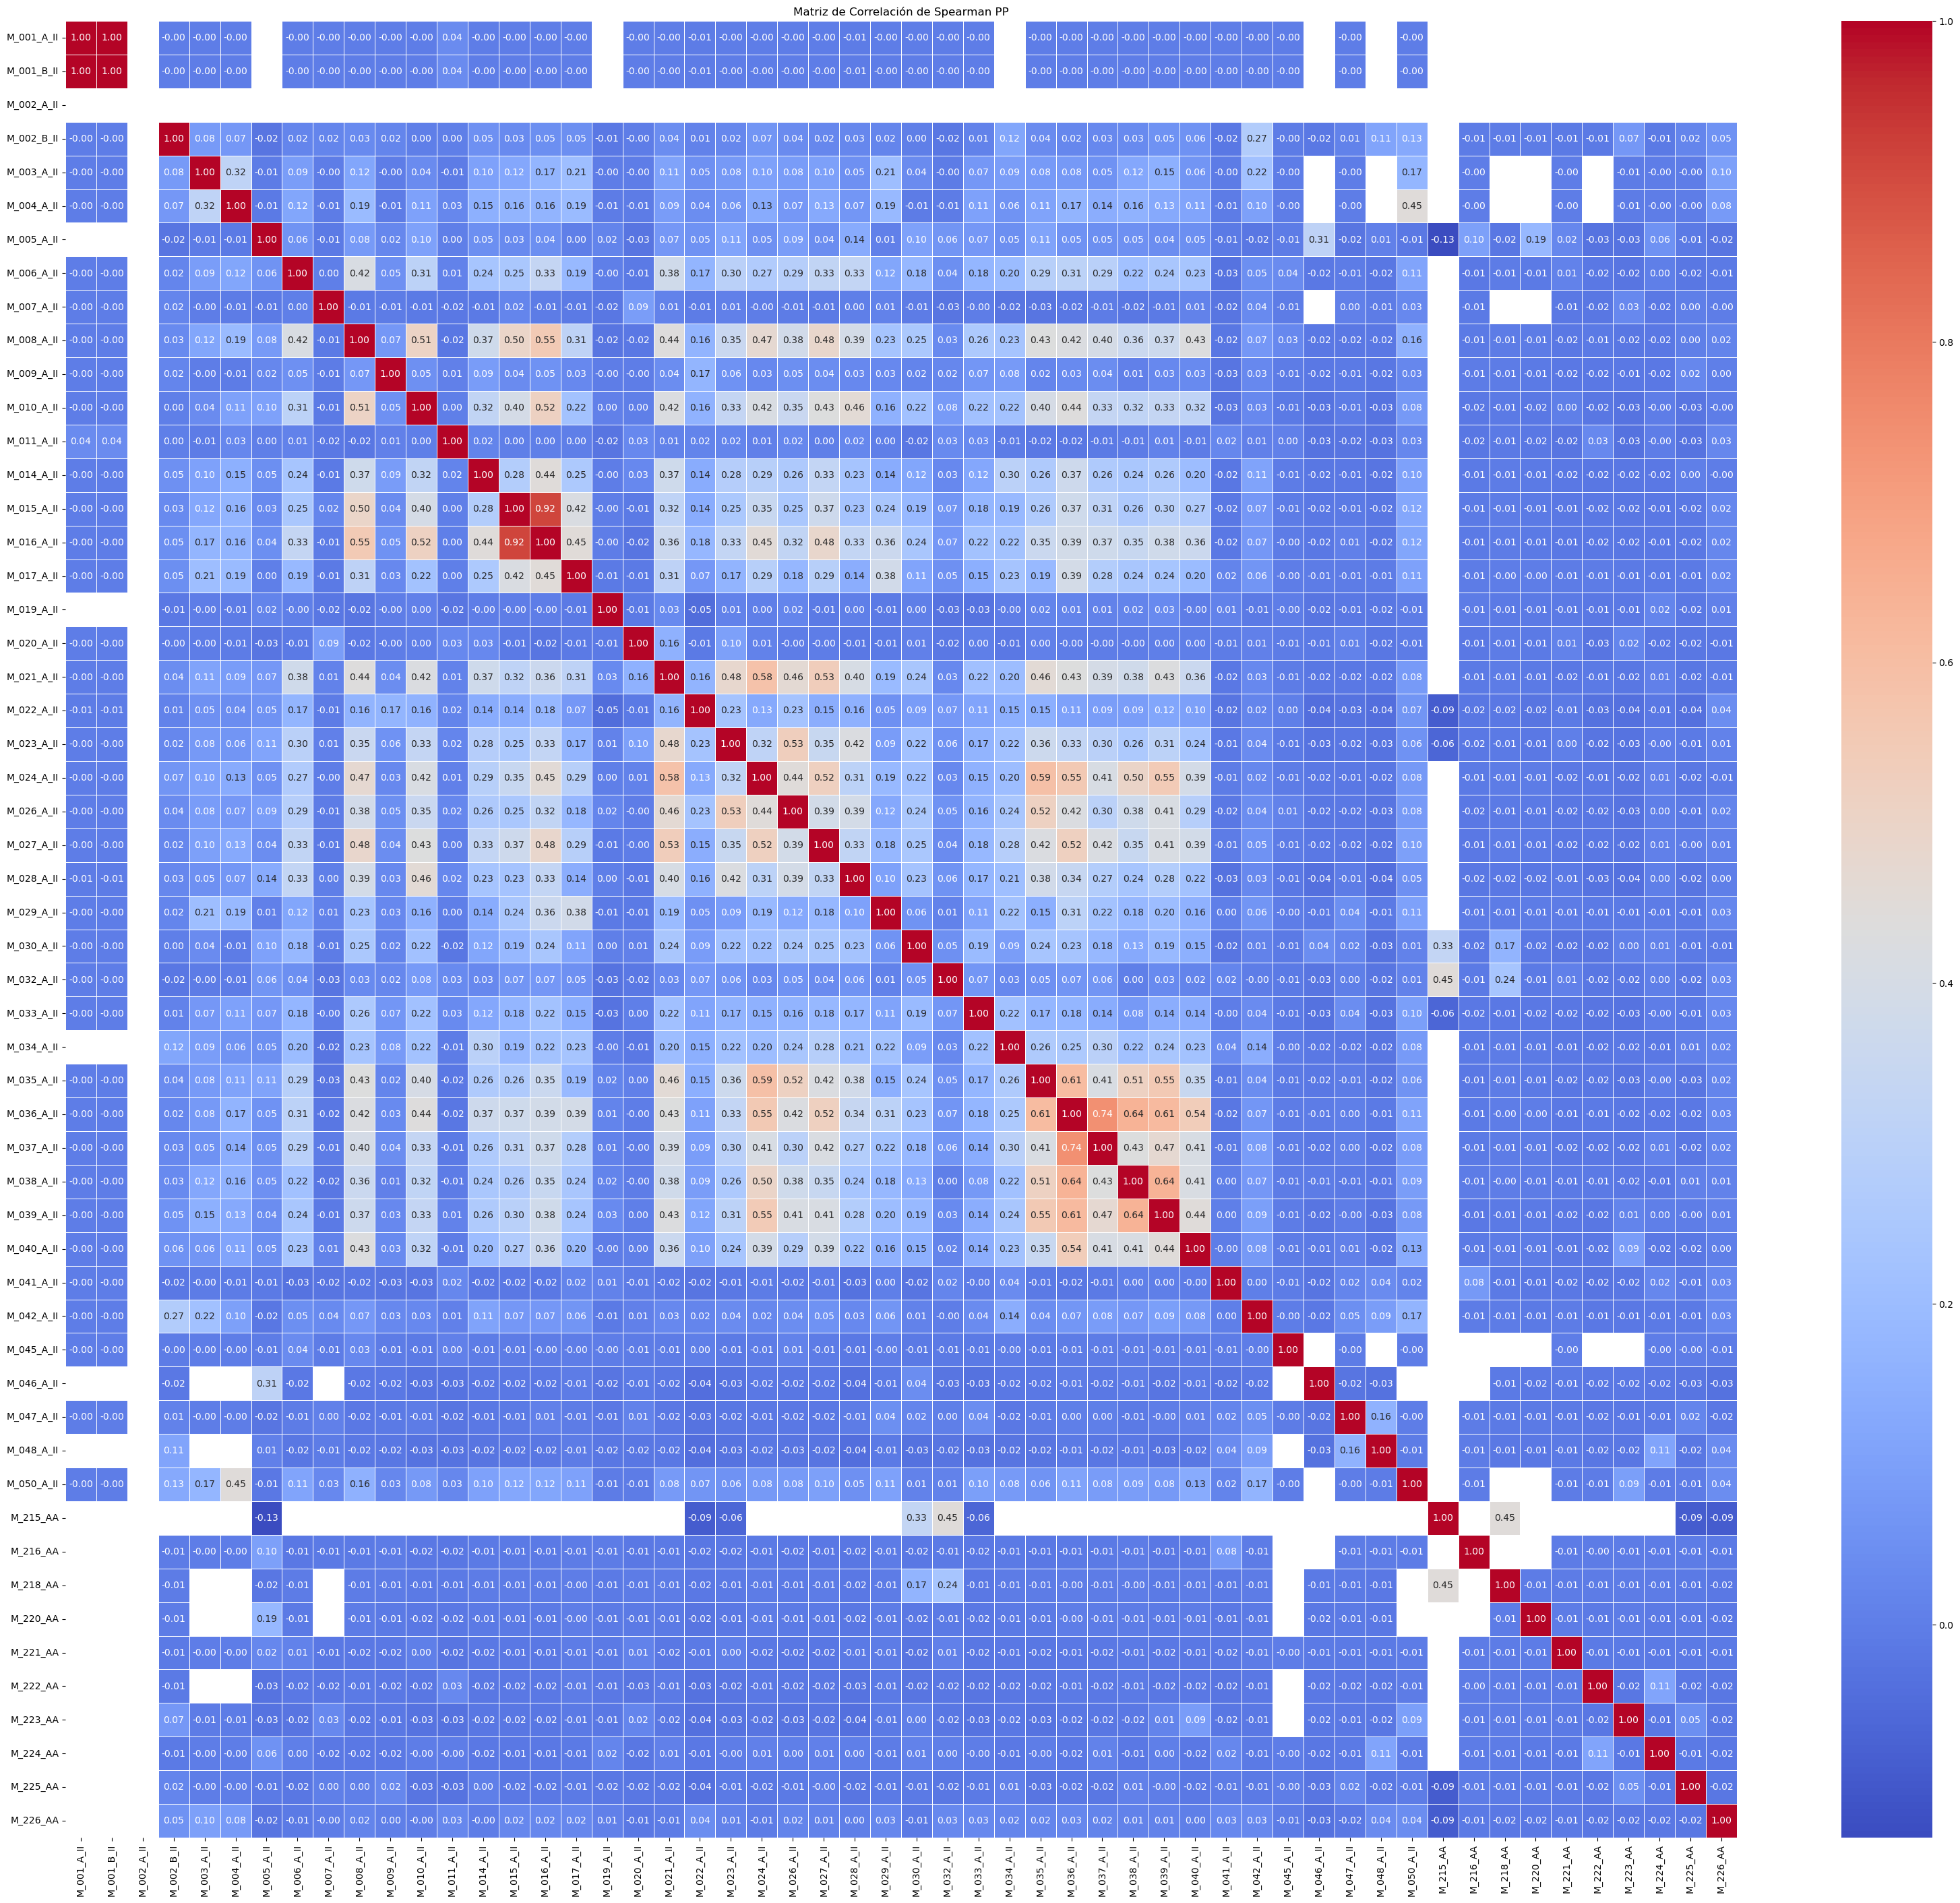

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(40, 35))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman PP")
plt.show()

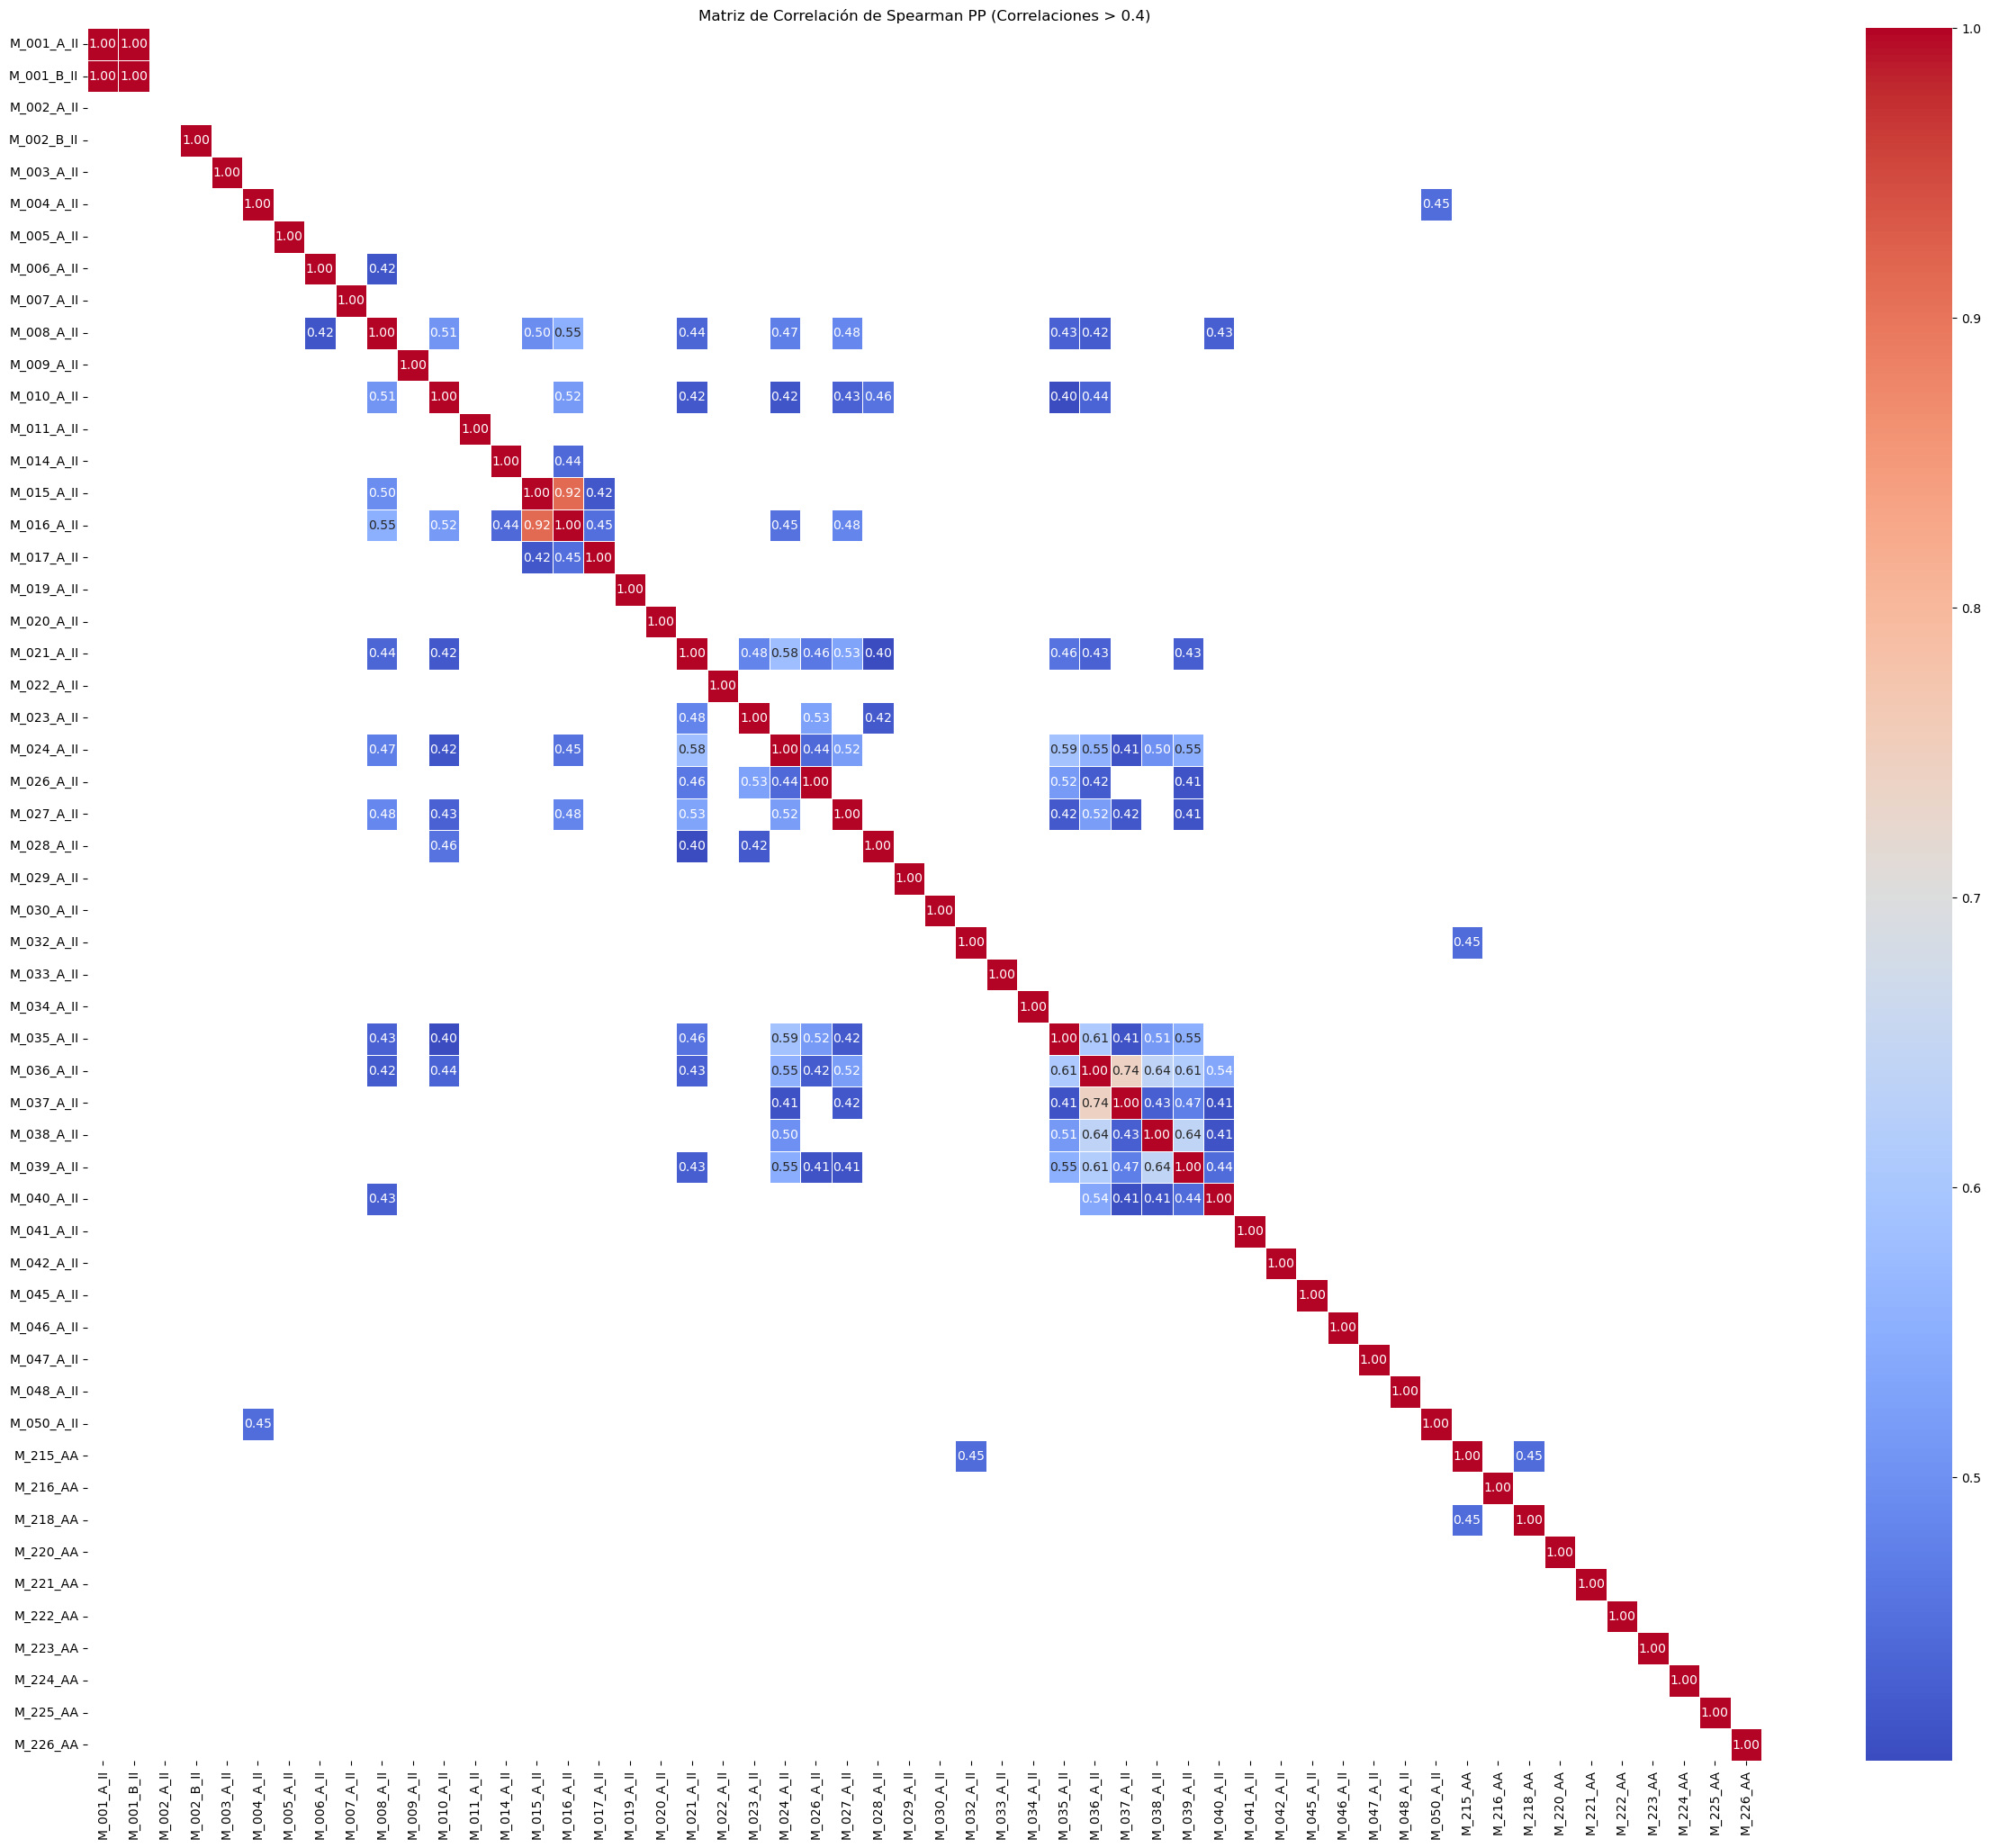

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman PP (Correlaciones > 0.4)")
plt.show()

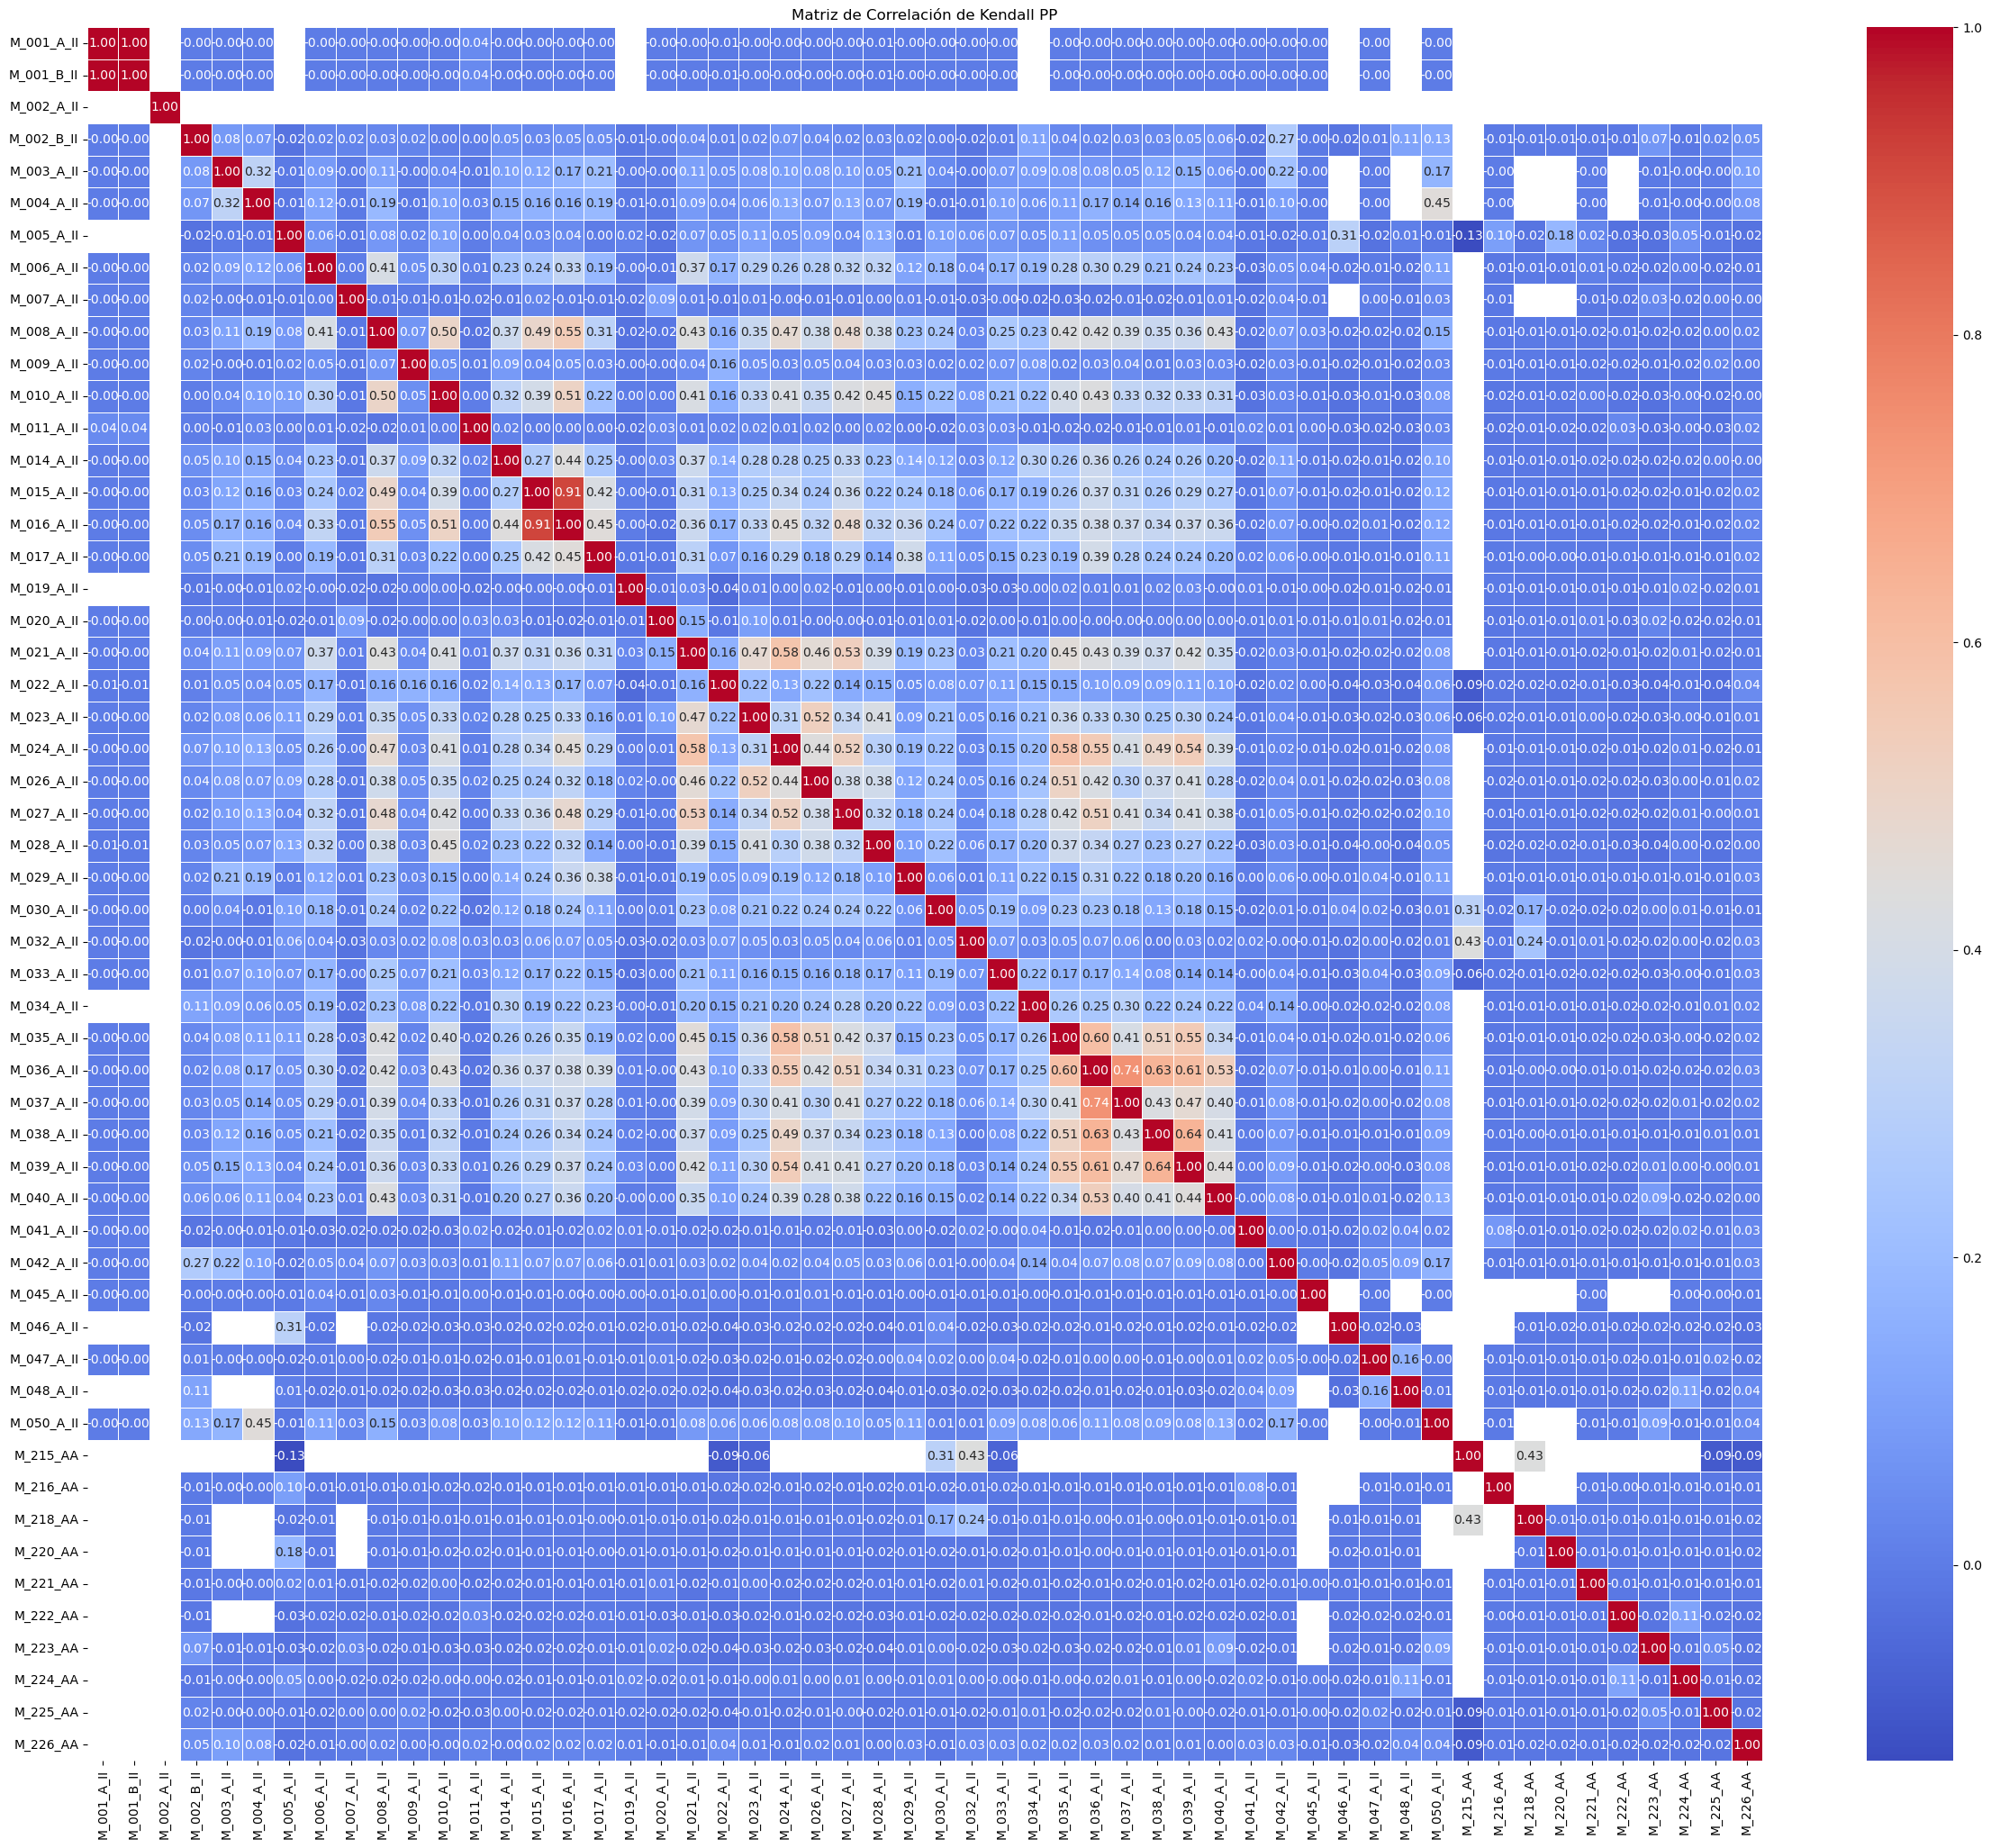

In [5]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall PP")
plt.show()

In [1]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizPPII.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_II.html')